<a href="https://colab.research.google.com/github/hydekage/WPT-BASIC/blob/master/WPT_BASIC_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study on Wireless Power Transfer with L-L Circuit No Compensation#
by: Sabriansyah Rizqika Akbar
Faculty of Computer Science Universitas Brawijaya

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import sin, pi, cos, MatrixSymbol, Matrix, exp,oo
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
L1,L2,R1,R2,RS,RL= sp.symbols('L_1,L_2,R_1,R_2,R_S,R_L',real=True,positive=True)
u,i1,i2,M,t = sp.symbols('u,i_1,i_2,M,t',positive=True,real=True)
omega,delta = sp.symbols('omega,Delta',positive =True,real=True)
s = sp.Symbol('s')
t,f = sp.symbols('t,f')
i2pi = sp.I*2*sp.pi

## 2.1. Wireless Power Transfer Circuit Topologies ##
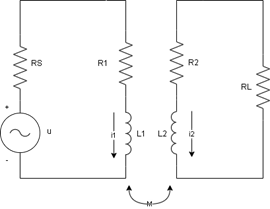

### 2.2 System Model ###
First, we wrote a parameter symbol for the WPT circuit which is $R_S,R_1,L_1,M$ and $R_L,R_2,L_2$ using KCL & KVL form as:

Loop 1 (Voltage Law):
Primary Circuit:
$$u = {i_1}{R_1}+{i_1}{R_S}+{L_1}{\frac{di_1}{dt}}+{M}{\frac{di_2}{dt}}$$
Secondary Circuit:
$$0 = {i_2}{R_2}+{i_2}{R_L}+{L_1}{\frac{di_2}{dt}}+{M}{\frac{di_1}{dt}}$$
Loop 2 (Current Law):
in sympy equations, we should treat the equations as follow (ex):
$$variable_{name} = u-{i_1}{R_S}-{i_1}{R_S}-{L_1}{\frac{di_1}{dt}}-{M}{\frac{di_2}{dt}}$$

In [4]:
i1d = (sp.Function('i_1')(t).diff(t))
i2d = (sp.Function('i_2')(t).diff(t))
eq1 = u-i1*RS-i1*R1-(L1*i1d+M*i2d)
eq2 = -(L2*i2d+M*i1d)-(i2*R2)-(i2*RL)
display('KVL Primary:',eq1,'KVL Secondary:',eq2)

'KVL Primary:'

-L_1*Derivative(i_1(t), t) - M*Derivative(i_2(t), t) - R_1*i_1 - R_S*i_1 + u

'KVL Secondary:'

-L_2*Derivative(i_2(t), t) - M*Derivative(i_1(t), t) - R_2*i_2 - R_L*i_2

In the Wireless Power Transfer(WPT) circuit, find the state space variables and afterwards we will obtain matrix A and B in the state space equation. Therefore, we need to define the matrix A and B using below operation in sympy. the equation:
$$x ̇=Ax+Bu$$
$$y=Cx+Du$$  
define the WPT state space equation as:
$$
\begin{bmatrix}
\frac{di_1}{dt}\\
\frac{di_2}{dt}\\
\end{bmatrix}
= A
\begin{bmatrix}
i_1\\
i_2\\
\end{bmatrix}
+ B
u
$$

$$
y =
C
\begin{bmatrix}
i_1\\
i_2\\
\end{bmatrix}+ Du
$$

In [9]:
sol = sp.solve((eq1,eq2),(i1d,i2d),Dict=True)
display(sol[i1d])
display(sol[i2d])

(-L_2*R_1*i_1 - L_2*R_S*i_1 + L_2*u + M*R_2*i_2 + M*R_L*i_2)/(L_1*L_2 - M**2)

(-L_1*R_2*i_2 - L_1*R_L*i_2 + M*R_1*i_1 + M*R_S*i_1 - M*u)/(L_1*L_2 - M**2)

In [11]:
di1dt = sp.poly(sol[i1d],(i1,i2,u)).as_dict()
di2dt = sp.poly(sol[i2d],(i1,i2,u)).as_dict()
print(di1dt,"\n\n",di2dt,"\n\n")
print(di1dt[1,0,0])
print(len(di1dt))

{(0, 0, 1): L_2/(L_1*L_2 - M**2), (0, 1, 0): (M*R_2 + M*R_L)/(L_1*L_2 - M**2), (1, 0, 0): (-L_2*R_1 - L_2*R_S)/(L_1*L_2 - M**2)} 

 {(0, 0, 1): -M/(L_1*L_2 - M**2), (0, 1, 0): (-L_1*R_2 - L_1*R_L)/(L_1*L_2 - M**2), (1, 0, 0): (M*R_1 + M*R_S)/(L_1*L_2 - M**2)} 


(-L_2*R_1 - L_2*R_S)/(L_1*L_2 - M**2)
3


### 2.2.1 State Space Matrix definition: ###

In [12]:
from sympy.printing.latex import LatexPrinter, print_latex
A_Row_1 = (di1dt[1,0,0],di1dt[0,1,0])
A_Row_2 = (di2dt[1,0,0],di2dt[0,1,0])
A  = Matrix([A_Row_1,A_Row_2])
display('A:',A)
B_Row_1 = (di1dt[0,0,1])
B_Row_2 = (di2dt[0,0,1])
B = Matrix([B_Row_1,B_Row_2])
display('B:',B)
#print_latex(A)
#print_latex(B)

'A:'

Matrix([
[(-L_2*R_1 - L_2*R_S)/(L_1*L_2 - M**2),      (M*R_2 + M*R_L)/(L_1*L_2 - M**2)],
[     (M*R_1 + M*R_S)/(L_1*L_2 - M**2), (-L_1*R_2 - L_1*R_L)/(L_1*L_2 - M**2)]])

'B:'

Matrix([
[L_2/(L_1*L_2 - M**2)],
[ -M/(L_1*L_2 - M**2)]])

In [13]:
CL = Matrix([[0,-RL]])
CS = Matrix([[-RS,0]])
D = Matrix([[0]])
display("CL:",CL,"CS:",CS,"D:",D)


'CL:'

Matrix([[0, -R_L]])

'CS:'

Matrix([[-R_S, 0]])

'D:'

Matrix([[0]])

### 2.2.2 Transfer Function Calculation: ###
$$\frac{Y(s)}{U(s)} =C[sI−A]^{−1} B+D$$
$$G_S(s)=\frac{Y_S(s)}{U(s)}$$
$$G_L(s)=\frac{Y_L(s)}{U(s)}$$

In [16]:
I = sp.eye(A.shape[0])
TFL = CL*sp.inv_quick(I*s - A)*B + D
TFS = CS*sp.inv_quick(I*s - A)*B + D
GLS =TFL[0].simplify().collect(s)
GSS =TFS[0].simplify().collect(s)
display(GLS)
display(GSS)

M*R_L*s/(R_1*R_2 + R_1*R_L + R_2*R_S + R_L*R_S + s**2*(L_1*L_2 - M**2) + s*(L_1*R_2 + L_1*R_L + L_2*R_1 + L_2*R_S))

R_S*(-L_2*s - R_2 - R_L)/(R_1*R_2 + R_1*R_L + R_2*R_S + R_L*R_S + s**2*(L_1*L_2 - M**2) + s*(L_1*R_2 + L_1*R_L + L_2*R_1 + L_2*R_S))

## 3. Results  ##

## Experiment-1 $R_L$ Voltage ##
$$L_1 = 10\mu H \quad L_2 = 100\mu H$$
$$R_1 = R_2 = 1\Omega \quad R_L=10\Omega$$
$$ M = K \sqrt{L_1L_2}$$ while $K=0.9$
and we assume $R_S=1\Omega$

In [17]:
L1v,L2v = 10e-6,100e-6
R1v,R2v =1,1
RSv,RLv = 1,10
Kv = 0.9
Mv = Kv*sp.sqrt(L1v*L2v)

$s=σ+jω$ this formula mentioned that formula Laplace conveniently reduces to Fourier along the imaginary axis.and the $σ$ is ignored (almost zero) since we want the response of the system to periodic (and thus non-decaying) sinusoidal signals. The variable $s$ represents the complex frequency domain in a transfer function, while $jw$ represents the imaginary component of the frequency domain. This replacement allows for easier mathematical manipulation and analysis of the transfer function. Since the transfere functions is $G(s)$, we want to obtain to $G(jw)$, therefore:4/

In [19]:
GLSS = GLS.subs(s,sp.I*omega)
display(GLSS)
GLSA = sp.Abs(GLSS).simplify()
display(GLSA)

I*M*R_L*omega/(R_1*R_2 + R_1*R_L + R_2*R_S + R_L*R_S - omega**2*(L_1*L_2 - M**2) + I*omega*(L_1*R_2 + L_1*R_L + L_2*R_1 + L_2*R_S))

M*R_L*omega/sqrt(L_1**2*L_2**2*omega**4 + L_1**2*R_2**2*omega**2 + 2*L_1**2*R_2*R_L*omega**2 + L_1**2*R_L**2*omega**2 - 2*L_1*L_2*M**2*omega**4 + L_2**2*R_1**2*omega**2 + 2*L_2**2*R_1*R_S*omega**2 + L_2**2*R_S**2*omega**2 + M**4*omega**4 + 2*M**2*R_1*R_2*omega**2 + 2*M**2*R_1*R_L*omega**2 + 2*M**2*R_2*R_S*omega**2 + 2*M**2*R_L*R_S*omega**2 + R_1**2*R_2**2 + 2*R_1**2*R_2*R_L + R_1**2*R_L**2 + 2*R_1*R_2**2*R_S + 4*R_1*R_2*R_L*R_S + 2*R_1*R_L**2*R_S + R_2**2*R_S**2 + 2*R_2*R_L*R_S**2 + R_L**2*R_S**2)

In [22]:
GLSV = GLSA.subs([(L1,L1v),(L2,L2v),(R1,R1v),(R2,R2v),(RS,RSv),(RL,RLv),(M,Mv),(omega,6.28*f)])
display(GLSV)
GLSV_lmd = sp.lambdify(f,GLSV)
display(GLSV)

8.12417878875986e-5*f/sqrt(1.16011332528132e-19*f**4 + 7.14943226446281e-9*f**2 + 1)

8.12417878875986e-5*f/sqrt(1.16011332528132e-19*f**4 + 7.14943226446281e-9*f**2 + 1)

In [23]:
dt_exp1 = np.arange(100, 450e3, 100)
x_axis   = dt_exp1
y_axis=[]
for i in x_axis:
    y_axis.append(GLSV_lmd(i))
from scipy.signal import find_peaks
peaks, _ = find_peaks(y_axis, height=0)
print(peaks,_)

[541] {'peak_heights': array([0.9180806])}


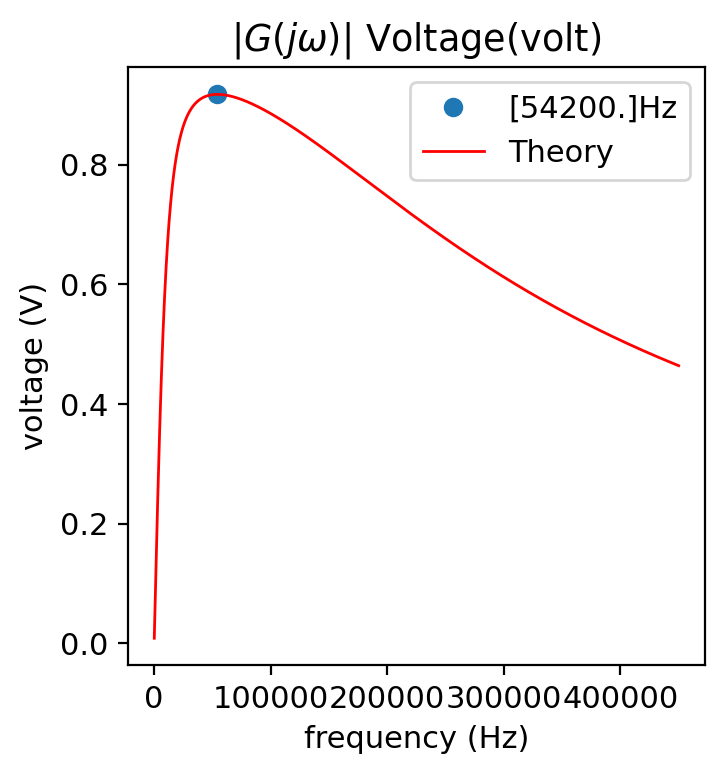

In [28]:
plt.title('$|G(j\omega)|$ Voltage(volt)')
plt.plot(x_axis[peaks], y_axis[541], '.', linewidth=2, markersize=12, label =str(x_axis[peaks])+"Hz")
plt.xlabel('frequency (Hz)')
plt.ylabel('voltage (V)')
plt.tight_layout()
#plt.plot(x_axis,y_s_data,color='black', ls='-',linewidth=2,dashes=[6, 2],label='SPICE Simulation')
plt.plot(x_axis,y_axis,color='red',ls = '-',label='Theory',linewidth=1)
plt.legend()
plt.show()

### 3.1 $R_L$ Average Voltage Time Domain Analysis###

Since our circuit transfer function was known as $$\displaystyle G_{L(s)} = \frac{C M R_{L} s^{2}}{R_{2} + R_{L} + s^{3} \left(C L_{1} L_{2} - C M^{2}\right) + s^{2} \left(C L_{1} R_{2} + C L_{1} R_{L} + C L_{2} R_{1} + C L_{2} R_{S}\right) + s \left(C R_{1} R_{2} + C R_{1} R_{L} + C R_{2} R_{S} + C R_{L} R_{S} + L_{2}\right)}$$ we will put above formula in the steady state equation in:
$$y_{ss}\left(f\right)\left(t\right)= \sum_{n=-N}^N{G_{LS}\left(jn\omega\right)\gamma_n(f)e^{jn\omega t}}$$
where:
$$\displaystyle \gamma_n = \frac{1}{T} \int_{t_0}^{t_0 + T} u(t) e^{-jn\omega t}{d}t$$

We are going to calculate by using sine wave voltage:

$$u(t)=u_0 sin(\omega t)$$

and we can simplifed the calculation of the steady state output voltage($y_{ss}$) into:

$$x(t)=e^{A(t-t_0)}x(t_0)+\int_{t_0}^{t}Bu(p)dp$$

$$y_{ss(t)}=u_0|G(j\omega)|sin(\omega{t}+\angle G(j\omega)$$

we will also able to calculate the steady state output power ($p_{ss}$) in the $R_L$ using:

$$p_{ss(t)}=\frac{y_{ss(t)}^2}{R_L}$$
$$p_{ss}=\frac{1}{T}\int_{t_0}^{t_0+T} \frac{y_{ss(t)}^2}{R_L} {dt}$$
$$p_{ss}=\frac{|G(j\omega)|^2}{2R_LT}\int_{t_0}^{t_0+T}(1-cos2(\omega t+\angle G(j\omega){dt}$$
$$p_{ss}=\frac{|G(j\omega)|^2}{2R_LT}$$

Based on the average power formula $p_{ss}$ we can obtain higher average power by optimize the $|G(j\omega)|^2$

### Experiment 2 - $y_{ss(t)}$ Average $R_L$ Voltage ###

In [39]:
freq = 100e3
t,n,T = sp.symbols('t,n,T')
omegav = (2*np.pi)*freq
period = (2*np.pi)/omegav
TF         = GLSV
display(TF)

8.12417878875986e-5*f/sqrt(1.16011332528132e-19*f**4 + 7.14943226446281e-9*f**2 + 1)

In [40]:
## Phase Calculation ##
#TF_jwov       = sb.named_expression("G_{L(jn\omega)}",TF_value.subs(s,1j*2*np.pi*freq))
TF_jwov = TF.subs(s,1j*2*np.pi*freq)
(re_part, im_part) = TF_jwov.expand(complex=True).as_real_imag()
TF_phase = sp.atan(im_part/ re_part)
print("TF Magnitude:",TF_jwov,"TF Phase:",TF_phase)
t0=0
yss = sp.Abs(TF_jwov)*sin(omegav*t+TF_phase)
pss = (yss**2)/(RLv)
yss_lmd = sp.lambdify(t,yss)
pss_lmd = sp.lambdify(t,pss)
print('yss:',yss,'\n pss:',pss)

TF Magnitude: 8.12417878875986e-5*f/sqrt(1.16011332528132e-19*f**4 + 7.14943226446281e-9*f**2 + 1) TF Phase: atan((8.12417878875986e-5*sin(atan2(0, 1.34586292749529e-38*re(f)**8 + 5.38345170998116e-38*re(f)**6*im(f)**2 + 1.65883032763991e-27*re(f)**6 + 8.07517756497173e-38*re(f)**4*im(f)**4 + 1.65883032763991e-27*re(f)**4*im(f)**2 + 5.13464043691981e-17*re(f)**4 + 5.38345170998116e-38*re(f)**2*im(f)**6 - 1.65883032763991e-27*re(f)**2*im(f)**4 + 1.00836627417946e-16*re(f)**2*im(f)**2 + 1.42988645289256e-8*re(f)**2 + 1.34586292749529e-38*im(f)**8 - 1.65883032763991e-27*im(f)**6 + 5.13464043691981e-17*im(f)**4 - 1.42988645289256e-8*im(f)**2 + 1)/4)**2*sin(atan2(4.64045330112529e-19*re(f)**3*im(f) - 4.64045330112529e-19*re(f)*im(f)**3 + 1.42988645289256e-8*re(f)*im(f), 1.16011332528132e-19*re(f)**4 - 6.96067995168794e-19*re(f)**2*im(f)**2 + 7.14943226446281e-9*re(f)**2 + 1.16011332528132e-19*im(f)**4 - 7.14943226446281e-9*im(f)**2 + 1)/2)*re(f)/Abs(1.34586292749529e-38*re(f)**8 + 5.3834517

In [41]:
x_axis   = np.arange(0, 1e-4, 1e-6)
y_axis   = np.array([yss_lmd(i) for i in x_axis])

AttributeError: 'int' object has no attribute 'arctan2'

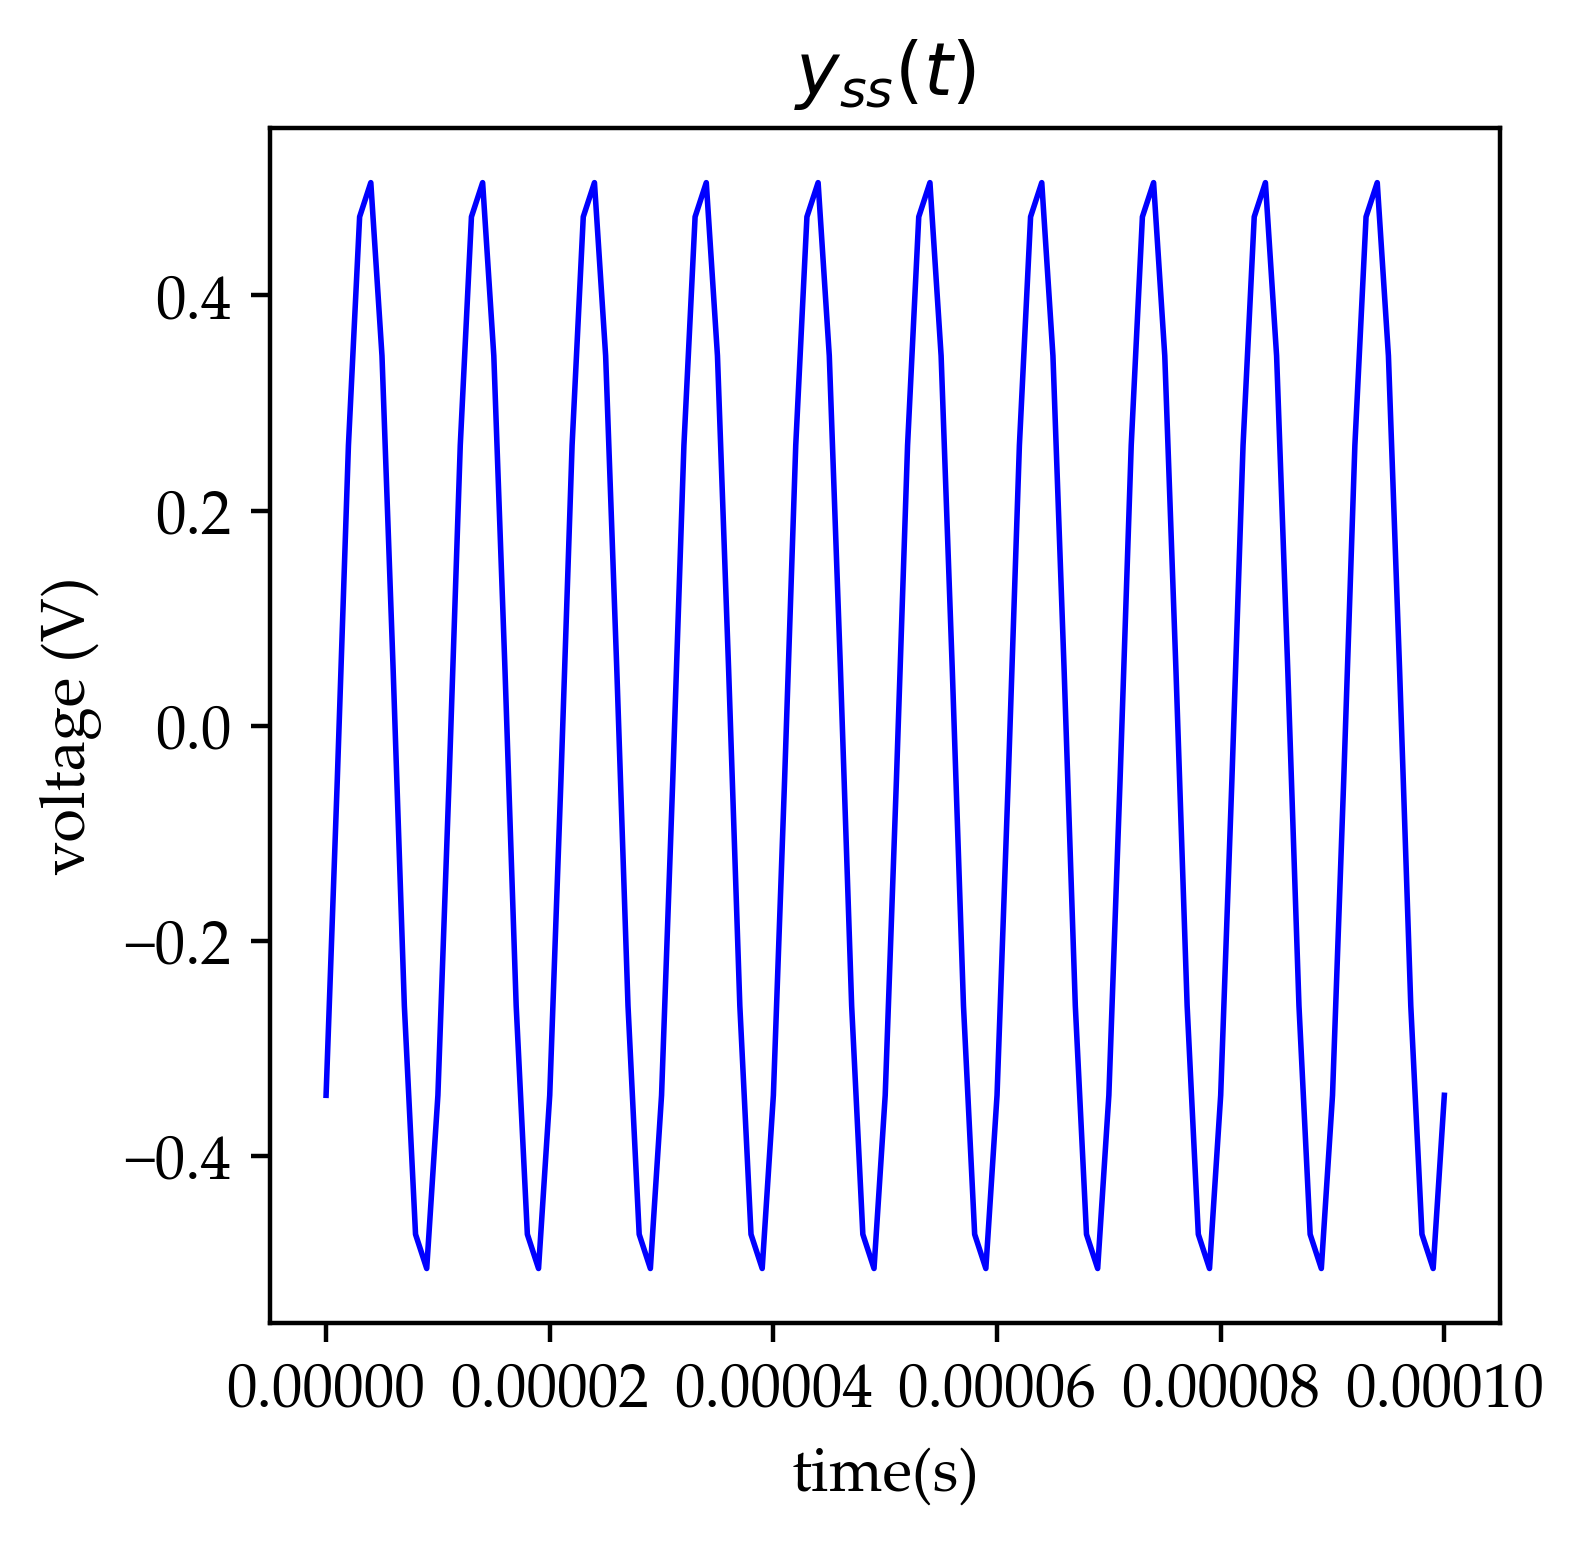

In [ ]:
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 400 # 200 e.g. is really fine, but slower
plt.rcParams['font.family'] = 'Palatino Linotype'
plt.rcParams['font.size'] = '11'
plt.title('$y_{ss}(t)$')
plt.xlabel('time(s)')
plt.ylabel('voltage (V)')
plt.tight_layout()
# ---plot LTSPICE simulation---
#plt.plot(x_axis_2,y_s_data_2,color='black', ls='-',linewidth=2, dashes=[1, 1],label='SPICE Simulation')
# ---plot calculation---
plt.plot(x_axis,y_axis,color='blue',ls = '-',linewidth=1)
#---file save---
#plt.legend(loc='lower right')
plt.savefig('img/figure-5a.png')